In [1]:
import pydicom
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
import time
folder = '/home/vbhandaru/PycharmProjects/Capstone'

In [2]:
def add_box(x1,y1,width,height):
    x2 = x1 + width
    y2 = y1 + height
    plt.plot([x1,x2],[y1,y1], color='red')
    plt.plot([x1,x1],[y1,y2], color='red')
    plt.plot([x1,x2],[y2,y2], color='red')
    plt.plot([x2,x2],[y1,y2], color='red')

In [26]:
h = pd.read_csv(folder + '/stage_1_detailed_class_info.csv')
h['n'] = 1
h = pd.DataFrame(h.groupby(['patientId', 'class'])['n'].sum())
pids = [i[0] for i in h.index.values]
classes = [i[1] for i in h.index.values]
counts = list(h['n'])
classes2 = []
classes3 = []
for i in range(len(counts)):
    if classes[i]=='Lung Opacity': classes2.append(classes[i] + ' (' + str(counts[i]) + ')')
    else: classes2.append(classes[i])
    if classes[i]=='Lung Opacity': classes3.append(classes[i])
    else: classes3.append('No Lung Opacity')
h1 = pd.DataFrame({'patientId': pids, 'class': classes, 'class2': classes2, 'class3': classes3})
fname = 'stage_1_train_labels.csv'
fname = folder + '/' + fname
df = pd.read_csv(fname)
h1.head(8)

,class,class2,class3,patientId
0,No Lung Opacity / Not Normal,No Lung Opacity / Not Normal,No Lung Opacity,0004cfab-14fd-4e49-80ba-63a80b6bddd6
1,No Lung Opacity / Not Normal,No Lung Opacity / Not Normal,No Lung Opacity,00313ee0-9eaa-42f4-b0ab-c148ed3241cd
2,No Lung Opacity / Not Normal,No Lung Opacity / Not Normal,No Lung Opacity,00322d4d-1c29-4943-afc9-b6754be640eb
3,Normal,Normal,No Lung Opacity,003d8fa0-6bf1-40ed-b54c-ac657f8495c5
4,Lung Opacity,Lung Opacity (2),Lung Opacity,00436515-870c-4b36-a041-de91049b9ab4
5,No Lung Opacity / Not Normal,No Lung Opacity / Not Normal,No Lung Opacity,00569f44-917d-4c86-a842-81832af98c30
6,No Lung Opacity / Not Normal,No Lung Opacity / Not Normal,No Lung Opacity,006cec2e-6ce2-4549-bffa-eadfcd1e9970
7,Lung Opacity,Lung Opacity (2),Lung Opacity,00704310-78a8-4b38-8475-49f4573b2dbb


In [33]:
def display(pid):
    im1 = pydicom.dcmread(folder + '/Training images/' + pid + '.dcm').pixel_array
    plt.title(pid)
    plt.imshow(im1, cmap='gray')
    temp = np.array(df[df['patientId']==pid].set_index('patientId'))
    if temp[0,4]==1:
        for i in range(temp.shape[0]):
            obs = temp[i]
            add_box(obs[0], obs[1], obs[2], obs[3]) 
    plt.show()

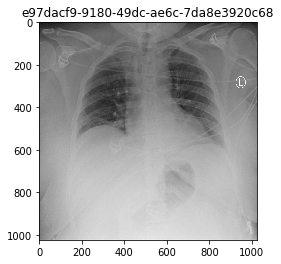

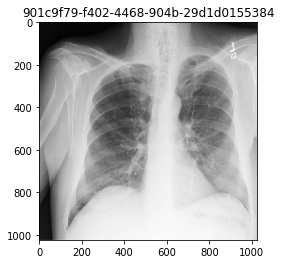

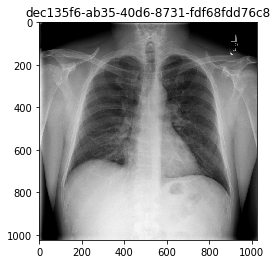

In [35]:
def show1(str, n):
    pids1 = h1[h1['class2']==str]
    pids1 = list(pids1['patientId'])
    ind = [np.int(i) for i in list(np.floor(np.random.uniform(0,len(pids1),n)))]
    for j in ind:
        display(pids1[j])

show1('Normal', 3)

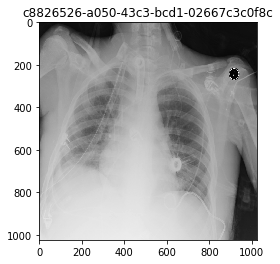

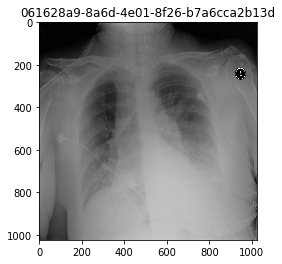

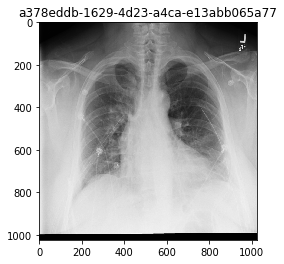

In [36]:
show1('No Lung Opacity / Not Normal', 3)

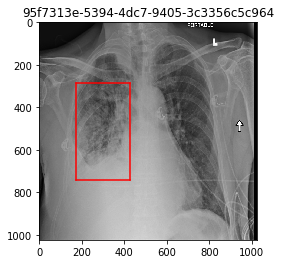

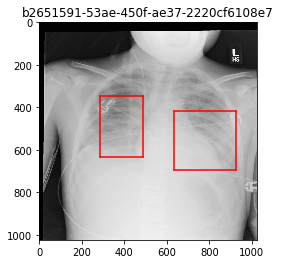

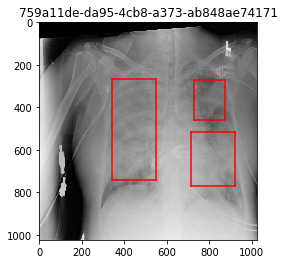

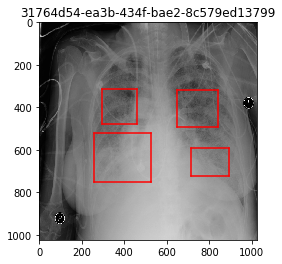

In [37]:
show1('Lung Opacity (1)', 1)
show1('Lung Opacity (2)', 1)
show1('Lung Opacity (3)', 1)
show1('Lung Opacity (4)', 1)